### **RGB Image Classification Capstone Project**

In [569]:
from torchgen.api.ufunc import kernel_name

''' Import all Important Libraries '''
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

In [570]:
torch.manual_seed(50)
Device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using Device :',Device)

Using Device : cpu


### **Data Pipeline**

In [571]:
Transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.5, 0.5, 0.5),
        std=(0.5, 0.5, 0.5))
    ])

In [572]:
class CIFAR10Dataset(Dataset):
    def __init__(self, train=True, transform=None):
        super().__init__()
        self.dataset = datasets.CIFAR10(
            root='./data',
            train=train,
            download=True,
        )
        self.transform = transform
        self.classes = self.dataset.classes
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        if self.transform:
            image = self.transform(image)
            return image, label

In [573]:
Train_dataset = CIFAR10Dataset(train=True, transform=Transformation)
Test_dataset = CIFAR10Dataset(train=False, transform=Transformation)
print(len(Train_dataset))
print(len(Test_dataset))

50000
10000


In [574]:
example_image, example_label = Train_dataset[0]
print(f'image shape:{example_image.shape}\n label shape:{Train_dataset.classes[example_label]}')

image shape:torch.Size([3, 32, 32])
 label shape:frog


### **Train, Test DataLoader**

In [575]:
Train_DataLoader = DataLoader(
    dataset=Train_dataset,
    batch_size=32,
    shuffle=True
)

Test_DataLoader = DataLoader(
    dataset=Test_dataset,
    batch_size=32,
    shuffle=False
)

### ***Convo > Pooling > Relu > Linear > Flatten***

In [576]:
class MyImageNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=3,
            out_channels=16,
            kernel_size=3,
            padding=1
        )
        self.pooling = nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
        self.relu = nn.ReLU()

        self.conv2 = nn.Conv2d(
            in_channels=16,
            out_channels=32,
            kernel_size=3,
            padding=1
        )

        self.conv3 = nn.Conv2d(
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            padding=1
        )
        self.conv4 = nn.Conv2d(
            in_channels=64,
            out_channels=128,
            kernel_size=3,
            padding=1
        )

        self.Linear1 = nn.Linear(128 * 2 * 2, 128)
        self.Linear2 = nn.Linear(128, 10)


    def forward(self, x):
        # First conv Layer
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pooling(x)

        # Second Conv Layer
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pooling(x)

        # Third Conv Layer
        x =self.conv3(x)
        x = self.relu(x)
        x = self.pooling(x)

        # Forth Conv Layer
        x = self.conv4(x)
        x = self.relu(x)
        x = self.pooling(x)

        # Flatten
        x = x.view(-1, 128 * 2 * 2)
        x = self.Linear1(x) # Layer 1
        x = self.relu(x)

        x = self.Linear2(x) # Layer 2


        return x

In [577]:
64*2*2

256

In [578]:
Model = MyImageNet().to(Device)
print(Model)

MyImageNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (Linear1): Linear(in_features=512, out_features=128, bias=True)
  (Linear2): Linear(in_features=128, out_features=10, bias=True)
)


### **Train Model**

100%|██████████| 1563/1563 [00:17<00:00, 88.59it/s]


Epoch 1/30 Loss: 1.488


100%|██████████| 1563/1563 [00:17<00:00, 88.29it/s]


Epoch 2/30 Loss: 1.088


100%|██████████| 1563/1563 [00:17<00:00, 88.64it/s]


Epoch 3/30 Loss: 0.905


100%|██████████| 1563/1563 [00:17<00:00, 89.58it/s]


Epoch 4/30 Loss: 0.781


100%|██████████| 1563/1563 [00:17<00:00, 89.61it/s]


Epoch 5/30 Loss: 0.687


100%|██████████| 1563/1563 [00:17<00:00, 89.18it/s]


Epoch 6/30 Loss: 0.613


100%|██████████| 1563/1563 [00:17<00:00, 89.69it/s]


Epoch 7/30 Loss: 0.546


100%|██████████| 1563/1563 [00:17<00:00, 89.79it/s]


Epoch 8/30 Loss: 0.491


100%|██████████| 1563/1563 [00:17<00:00, 87.06it/s]


Epoch 9/30 Loss: 0.437


100%|██████████| 1563/1563 [00:18<00:00, 83.63it/s]


Epoch 10/30 Loss: 0.390


100%|██████████| 1563/1563 [00:18<00:00, 82.93it/s]


Epoch 11/30 Loss: 0.349


100%|██████████| 1563/1563 [00:18<00:00, 83.10it/s]


Epoch 12/30 Loss: 0.312


100%|██████████| 1563/1563 [00:18<00:00, 85.19it/s]


Epoch 13/30 Loss: 0.285


100%|██████████| 1563/1563 [00:18<00:00, 85.84it/s]


Epoch 14/30 Loss: 0.256


100%|██████████| 1563/1563 [00:17<00:00, 87.30it/s]


Epoch 15/30 Loss: 0.242


100%|██████████| 1563/1563 [00:17<00:00, 87.31it/s]


Epoch 16/30 Loss: 0.216


100%|██████████| 1563/1563 [00:17<00:00, 87.50it/s]


Epoch 17/30 Loss: 0.205


100%|██████████| 1563/1563 [00:17<00:00, 87.17it/s]


Epoch 18/30 Loss: 0.194


100%|██████████| 1563/1563 [00:17<00:00, 87.06it/s]


Epoch 19/30 Loss: 0.187


100%|██████████| 1563/1563 [00:18<00:00, 85.03it/s]


Epoch 20/30 Loss: 0.171


100%|██████████| 1563/1563 [00:18<00:00, 86.65it/s]


Epoch 21/30 Loss: 0.160


100%|██████████| 1563/1563 [00:18<00:00, 86.32it/s]


Epoch 22/30 Loss: 0.168


100%|██████████| 1563/1563 [00:18<00:00, 85.74it/s]


Epoch 23/30 Loss: 0.151


100%|██████████| 1563/1563 [00:18<00:00, 85.77it/s]


Epoch 24/30 Loss: 0.143


100%|██████████| 1563/1563 [00:18<00:00, 85.73it/s]


Epoch 25/30 Loss: 0.154


100%|██████████| 1563/1563 [00:18<00:00, 85.59it/s]


Epoch 26/30 Loss: 0.138


100%|██████████| 1563/1563 [00:19<00:00, 78.17it/s]


Epoch 27/30 Loss: 0.132


100%|██████████| 1563/1563 [00:19<00:00, 78.44it/s]


Epoch 28/30 Loss: 0.134


100%|██████████| 1563/1563 [00:21<00:00, 72.93it/s]


Epoch 29/30 Loss: 0.126


100%|██████████| 1563/1563 [00:27<00:00, 56.98it/s]

Epoch 30/30 Loss: 0.132


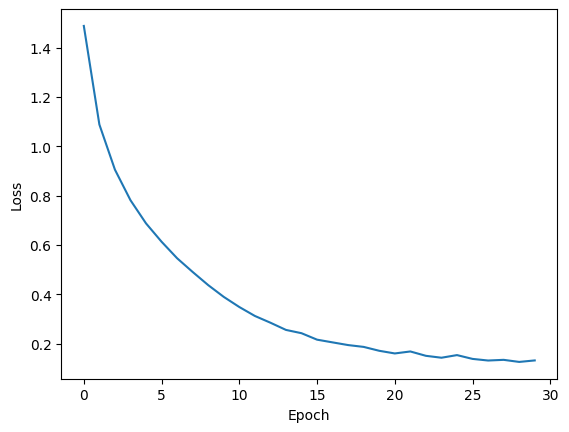

In [579]:
from tqdm import tqdm
import os
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Model.parameters(), lr=0.001)
num_epochs = 30
criterion_losses = []
for epoch in range(num_epochs):
    Model.train()
    running_loss = 0.0
    batch=0


    for images, label in tqdm(Train_DataLoader):
        images, label = images.to(Device), label.to(Device)
        batch += 1
        optimizer.zero_grad()
        outputs = Model(images)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(Train_DataLoader)
    criterion_losses.append(epoch_loss)
    print(f'Epoch {epoch + 1}/{num_epochs} Loss: {epoch_loss:.3f}')

import matplotlib.pyplot as plt
plt.plot(criterion_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### **Model Evaluation**

In [580]:
Model.eval()
total = 0
correct = 0
with torch.no_grad():
    for images, label in Test_DataLoader:
        images, label = images.to(Device), label.to(Device)
        outputs = Model(images)
        _, Predict = torch.max(outputs.data, 1)
        total += label.size(0)
        correct += (Predict == label).sum().item()

best_model = 0
Accuracy = 100 * correct / total
print(f'Accuracy: {Accuracy:.3f}')
if Accuracy > best_model:
    best_model = Accuracy
    torch.save(Model.state_dict(), 'Best_Model.pt')


Accuracy: 70.870
